In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from keras import regularizers
import matplotlib.pyplot as plt
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model
from keras.utils import plot_model
import os
import numpy as np

In [4]:
from google.colab import drive
import zipfile

drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (10).zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [6]:
train_data_dir = '/content/dataset/dataset/train'
validation_data_dir = '/content/dataset/dataset/validation'
test_data_dir = '/content/dataset/dataset/test'



In [7]:
img_width, img_height = 150, 150


In [8]:
epochs = 30
batch_size = 32
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# this is the augmentation configuration we will use for testing:
# only rescaling
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
model = None

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


In [12]:
from keras.layers import Activation
if not os.path.exists('dog-cat-final-model.h5'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])
    plot_model(model, to_file='cat-dog-classification.png', show_shapes=True)
    if os.path.exists('dog-cat-weights.h5'):
        model.load_weights('dog-cat-weights.h5')
    else:
        model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size,
            verbose=1)
        model.save_weights('dog-cat-weights.h5')
    model.save('dog-cat-final-model.h5')
else:
    print('Load entire model from file')
    model = load_model('dog-cat-final-model.h5')
print('Start evaluating')
score = model.evaluate_generator(test_generator, steps= nb_test_samples // batch_size)
print('Evaluate loss: {0}, accuracy {1}'.format(score[0], score[1]))

<ipython-input-12-3ee98c7cfe4e>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/30
546/546 [==============================] - 691s 1s/step - loss: 0.6535 - accuracy: 0.6158 - val_loss: 0.6257 - val_accuracy: 0.6510
Epoch 2/30
546/546 [==============================] - 658s 1s/step - loss: 0.5815 - accuracy: 0.6987 - val_loss: 0.5377 - val_accuracy: 0.7412
Epoch 3/30
546/546 [==============================] - 668s 1s/step - loss: 0.5360 - accuracy: 0.7340 - val_loss: 0.4760 - val_accuracy: 0.7752
Epoch 4/30
546/546 [==============================] - 662s 1s/step - loss: 0.5073 - accuracy: 0.7554 - val_loss: 0.4812 - val_accuracy: 0.7804
Epoch 5/30
546/546 [==============================] - 664s 1s/step - loss: 0.4741 - accuracy: 0.7790 - val_loss: 0.4437 - val_accuracy: 0.7925
Epoch 6/30
546/546 [==============================] - 666s 1s/step - loss: 0.4524 - accuracy: 0.7952 - val_loss: 0.4113 - val_accuracy: 0.8145
Epoch 7/30
546/546 [==============================] - 665s 1s/step - loss: 0.4332 - accuracy: 0.8032 - val_loss: 0.4014 - val_accuracy: 0.8309

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-12-3ee98c7cfe4e>:36: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps= nb_test_samples // batch_size)


Start evaluating
Evaluate loss: 0.27549490332603455, accuracy 0.8940304517745972


In [17]:
image = image.load_img('/content/dataset/dataset/test/cats/cat (1).jpg',target_size=(150,150,3))
image = np.asarray(image)
image = np.expand_dims(image, axis=0)
image = image * 1.0 / 255

predicted = model.predict(image)
print('Predicted result: {0} '.format(predicted))

1/1 [==============================] - 1s 731ms/step
Predicted result: [[9.994553e-01 5.447743e-04]] 


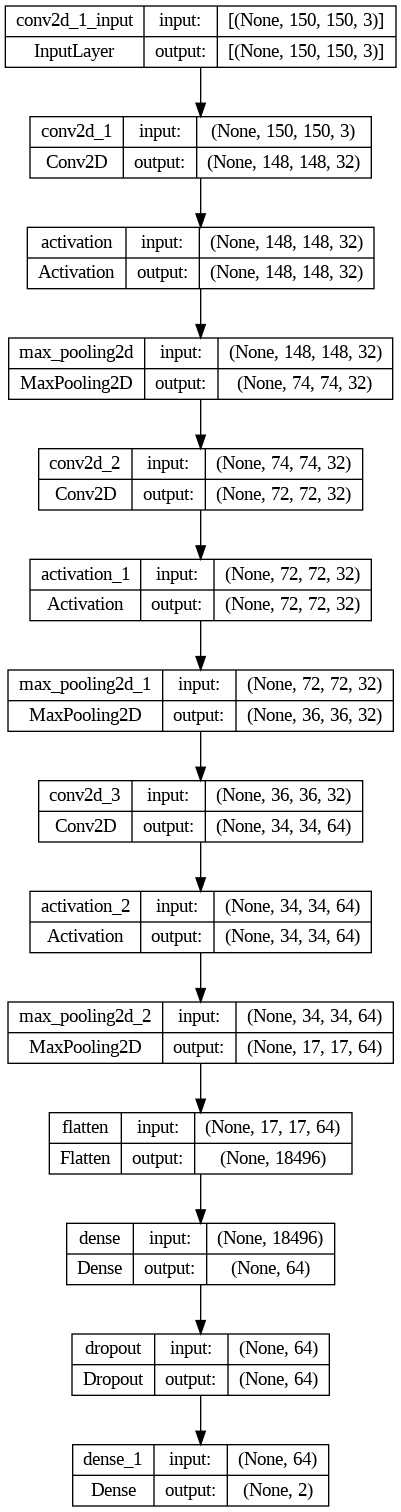

In [24]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=500, height=1500)